# Analysis of model rocket flight data

Uses output from the [rocket.py](https://github.com/HeardLibrary/digital-scholarship/blob/master/code/circuit_python/rocket_script.py) script. An example `motion.csv` file is [here](https://github.com/HeardLibrary/digital-scholarship/blob/master/code/circuit_python/motion.csv).


(c) 2022 Vanderbilt University. This program is released under a GNU General Public License v3.0 http://www.gnu.org/licenses/gpl-3.0

Author: Steve Baskauf 2022-04-08

## Notes

For a Python library that does inertial measurement unit (IMU) calculations, see https://github.com/micropython-IMU/micropython-fusion

For notes on pitch, roll, and yaw movements, see http://planning.cs.uiuc.edu/node102.html

![rotation axes](https://upload.wikimedia.org/wikipedia/commons/b/b8/Roll_Pitch_Yaw.JPG)

NASA derivative work: labeling modified by Brews ohare, Public domain, via Wikimedia Commons

## Load data

The generic column names in the file are changed to reflect the axes on the rocket:

- "roll" is the long axis of the rocket passing from the nose to the tail, and corresponds to the Y axis on the sensor board.
- "pitch" is arbitrarily one of the axes in the plane perpendicular to the roll axis. It's determined by the placement of the sensor unit within the payload section and corresponds to the X axis on the sensor board.
- "yaw" is an axis in the plane perpendicular to the roll axis and also perpendicular to the pitch axis. It corresponds to the Z axis on the sensor board.

These three rotation axes correspond to those typically used for airplanes. However, since the rocket does not have wings to define the pitch and yaw orientations, they are arbitrarily located relative to the rocket fins. When applied to the acceleration measurements, the acceleration axes are in the same orientation as the rotation axes.

## Plotting

The plot can be used to select the starting and ending times for the intervals to be plotted in subsequent cells, and to define the altitude to be used as a zero reference.

,alt,pitch_a,roll_a,yaw_a,pitch_r,roll_r,yaw_r
time,,,,,,,
44.2480,93.3040,7.61875,-6.75494,1.04088,-3.68715,20.17660,4.720620
44.3076,91.1584,4.16590,-5.70928,5.38625,-5.19293,20.07280,-5.676910
44.4365,89.9218,10.54280,-4.40519,-8.08774,-5.99927,1.89158,2.035870
44.5313,90.0170,12.40920,-8.57827,3.98405,-5.27051,20.17660,0.092706
44.5898,91.0844,-2.15593,-6.18305,5.44606,-1.22658,19.86750,-5.286570


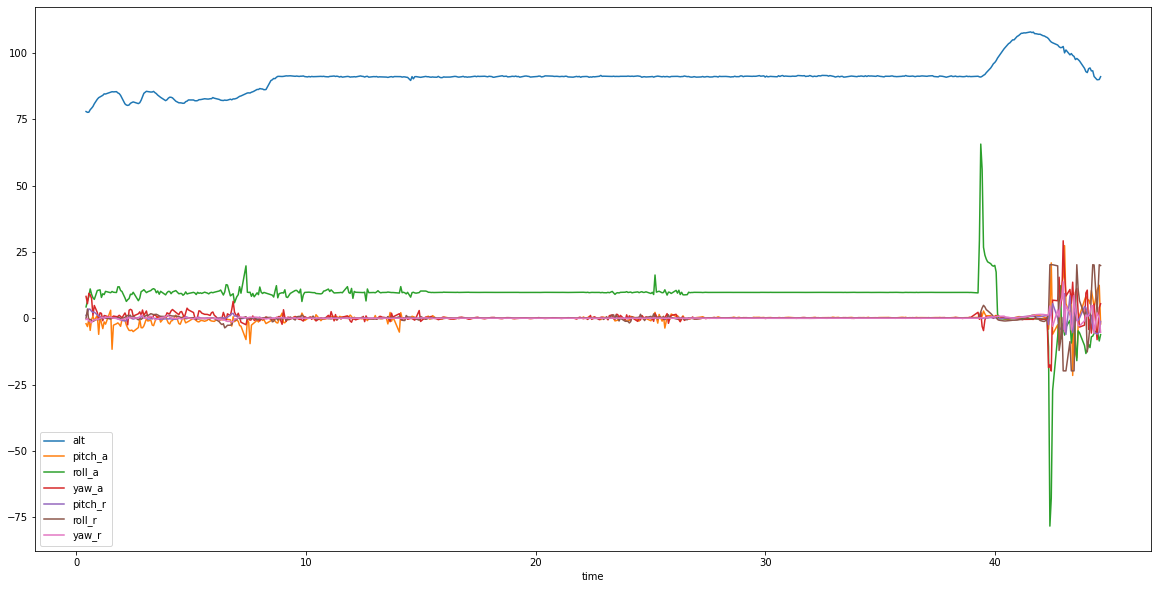

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_file_name = 'motion.csv' # default filename output from rocket script
#data_file_name = 'deck.csv' # change to deck.csv to look at a test data set of throwing a rocket off of a deck
flight_data_raw = pd.read_csv(data_file_name)
flight_data_raw.columns = ['time', 'alt', 'pitch_a', 'roll_a', 'yaw_a', 'pitch_r', 'roll_r', 'yaw_r']
flight_data_raw.set_index('time', inplace=True)

flight_data_raw.plot(figsize=(20,10))
flight_data_raw.tail()

## Set reference values and extract flight data to be plotted

In [79]:
# Relevant time interval for a test of throwing rocket off of deck (the deck.csv file)
start_time = 39.25
end_time = 44.6
ground_elevation = 91

flight_data = flight_data_raw.loc[(flight_data_raw.index>start_time) & (flight_data_raw.index<end_time)].copy()
flight_data

,alt,pitch_a,roll_a,yaw_a,pitch_r,roll_r,yaw_r
time,,,,,,,
39.2549,91.2536,0.327817,9.54736,2.234900,0.063562,0.023555,-0.013584
39.3154,91.0210,0.559921,29.41980,-0.416351,0.077001,0.361364,0.063385
39.3740,90.9576,2.182250,65.66860,2.103290,0.068449,2.405930,0.136078
39.4336,91.2219,0.741775,56.11650,-3.074780,-0.084267,3.852460,0.150127
39.4932,91.6129,2.720640,26.75420,-4.673180,0.009806,4.865880,0.101869
...,...,...,...,...,...,...,...
44.2480,93.3040,7.618750,-6.75494,1.040880,-3.687150,20.176600,4.720620
44.3076,91.1584,4.165900,-5.70928,5.386250,-5.192930,20.072800,-5.676910
44.4365,89.9218,10.542800,-4.40519,-8.087740,-5.999270,1.891580,2.035870


# Altitude

Note that the altitude is determined by a barometric pressure measurement. Hence, anything that affects the air pressure on the sensor can cause artifacts that do not reflect the actual altitude of the sensor.

Text(0, 0.5, 'altitude (m)')

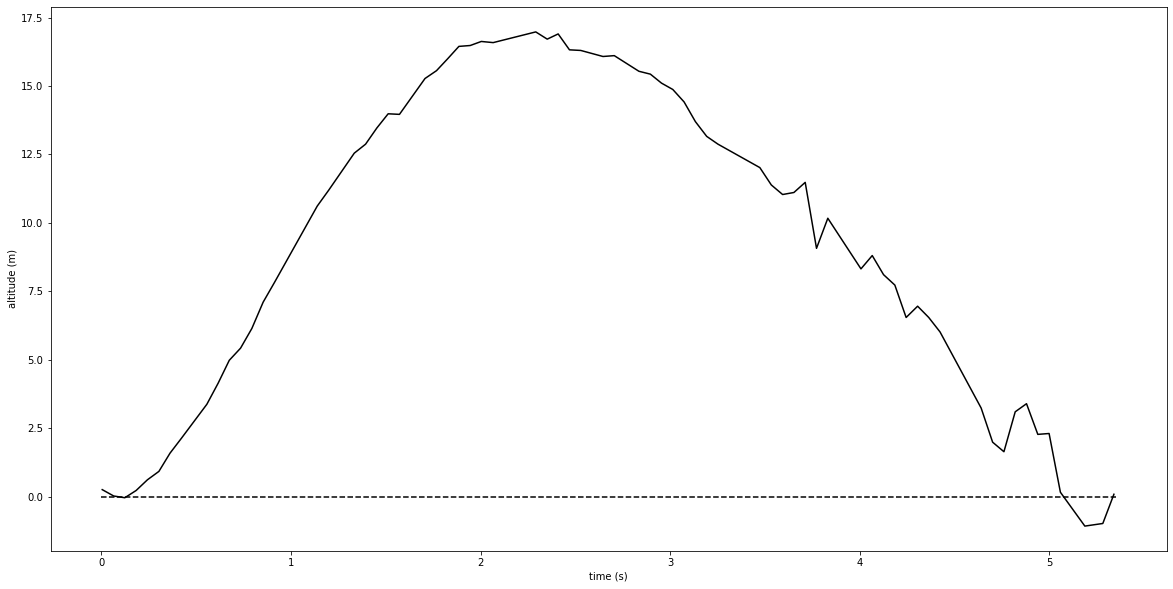

In [90]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot([0, end_time - start_time], [0, 0], "k--")
ax.plot(flight_data.index - start_time, flight_data.alt - ground_elevation, color='k')
ax.set_xlabel('time (s)')
ax.set_ylabel('altitude (m)')



# Acceleration

The next set of plots graph the components of acceleration measured directly by the sensor or acceleration values derived from the raw components

## Raw acceleration components

These measurements do not directly measure the acceleration of the rocket since there is always an acceleration vector caused by gravity (g) in the downward direction. When the rocket is not accelerating (moving at a constant velocity including velocity = 0; i.e. motionless), the vector sum of the acceleration components will be equal to g. For example when the rocket is on the launch pad with the + roll axis pointing up, the roll acceleration will be about 10 m/s^2 (the value of g). When the rocket is in free fall, the vector of the actual downward acceleration of the rocket will balance g and all three components of acceleration will read 0.

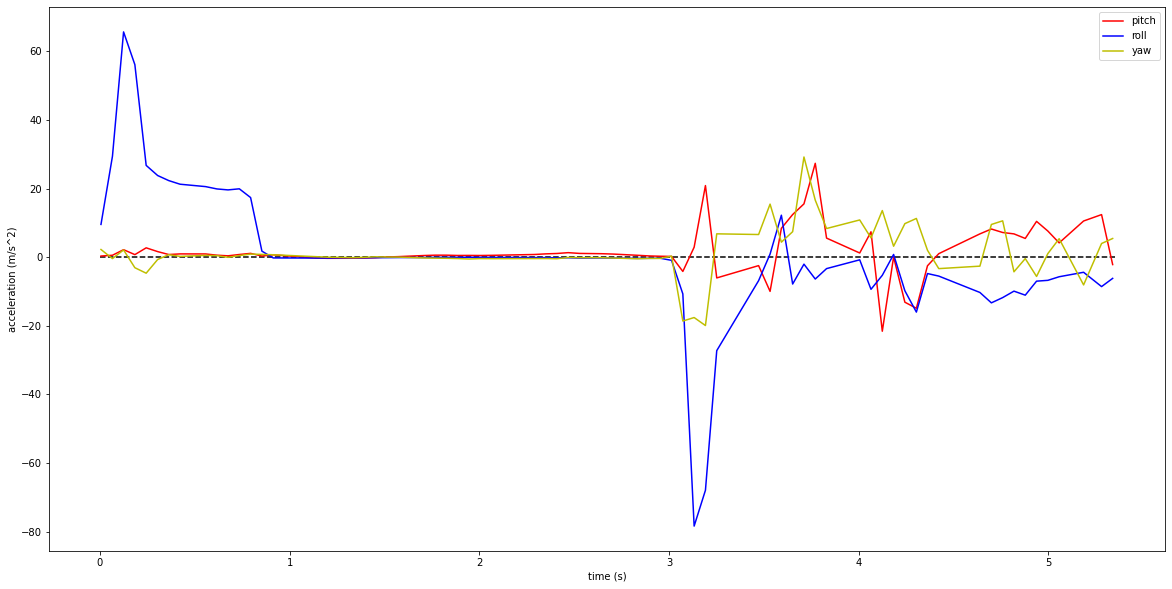

In [91]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot([0, end_time - start_time], [0, 0], "k--")
ax.plot(flight_data.index - start_time, flight_data.pitch_a, color='r', label='pitch')
ax.plot(flight_data.index - start_time, flight_data.roll_a, color='b', label='roll')
ax.plot(flight_data.index - start_time, flight_data.yaw_a, color='y', label='yaw')
ax.set_xlabel('time (s)')
ax.set_ylabel('acceleration (m/s^2)')
ax.legend(loc='best')


## Actual upward acceleration

When the rocket is point up, the actuall upward acceleration can be calculated by simply subtracting g from the measured roll acceleration. However, if the rocket tilts during flight (which it nearly always does), this value will be less accurate.

Text(0, 0.5, 'actual upward acceleration (m/s^2)')

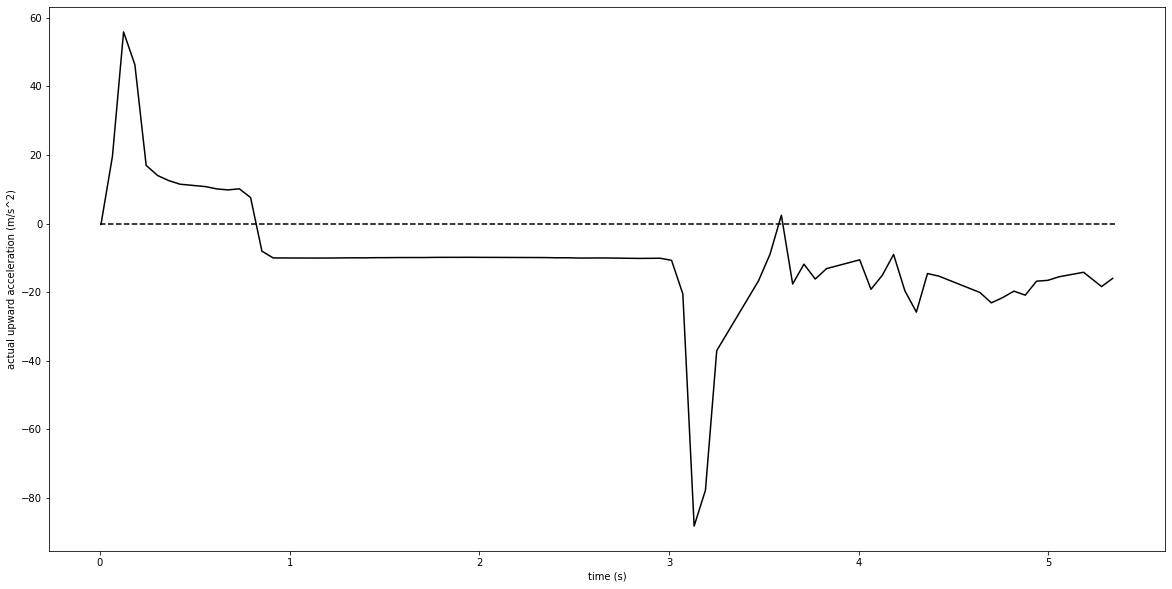

In [92]:
# Estimate the acceleration in the direction of the rocket nose cone.
# Assumes the rocket is pointing up.
g = 9.8
engine_accel = flight_data.roll_a - g

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot([0, end_time - start_time], [0, 0], "k--")
ax.plot(flight_data.index - start_time, engine_accel, color='k')
ax.set_xlabel('time (s)')
ax.set_ylabel('actual upward acceleration (m/s^2)')


## Overall acceleration

The vector sum of all acceleration components is calculated and graphed in this plot. It provides a general visualization of the overall acceleration of the rocket, although it also includes g. So the actual overall acceleration of the rocket could be as much as 10 m/s^2 more or less than what's graphed here. It does, however, give a better overall view than the vector components.

Text(0, 0.5, 'overall acceleration (m/s^2)')

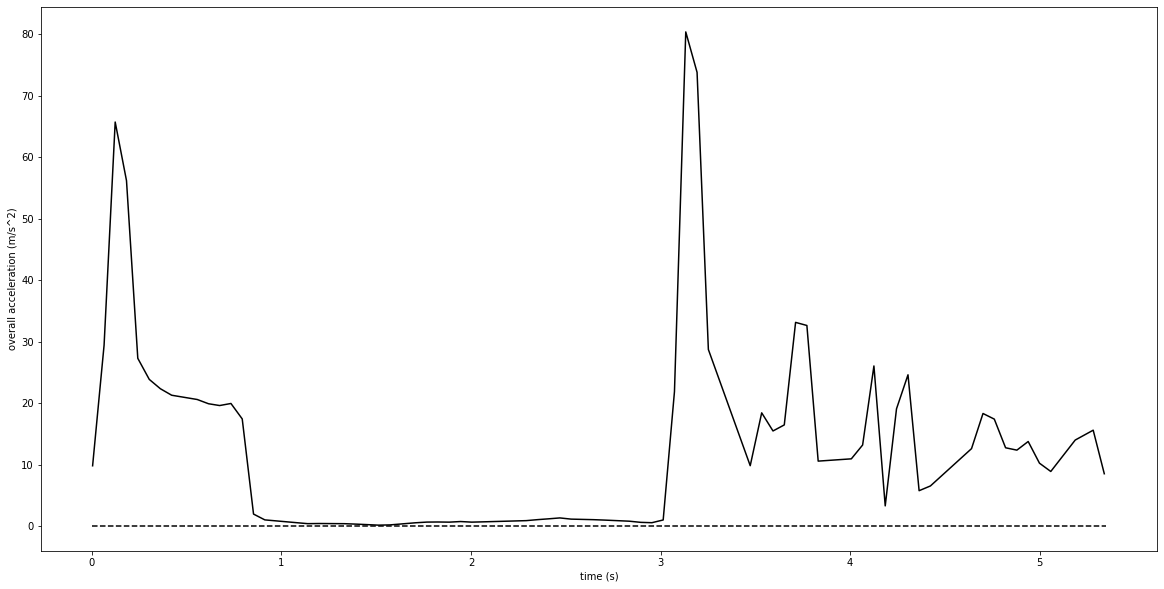

In [93]:
# Calculate overall acceleration, i.e. the vector sum of acceleration in any direction.
# This value should be zero when in free-fall.
net_accel = np.sqrt(flight_data.pitch_a**2 + flight_data.roll_a**2 + flight_data.yaw_a**2)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot([0, end_time - start_time], [0, 0], "k--")
ax.plot(flight_data.index - start_time, net_accel, color='k')
ax.set_xlabel('time (s)')
ax.set_ylabel('overall acceleration (m/s^2)')


## Composite acceleration plot

The acceleration components and overall acceleration are plotted below the altitude to make it easier to see how the acceleration corresponds to the flight profile.

Text(0.5, 0, 'time (s)')

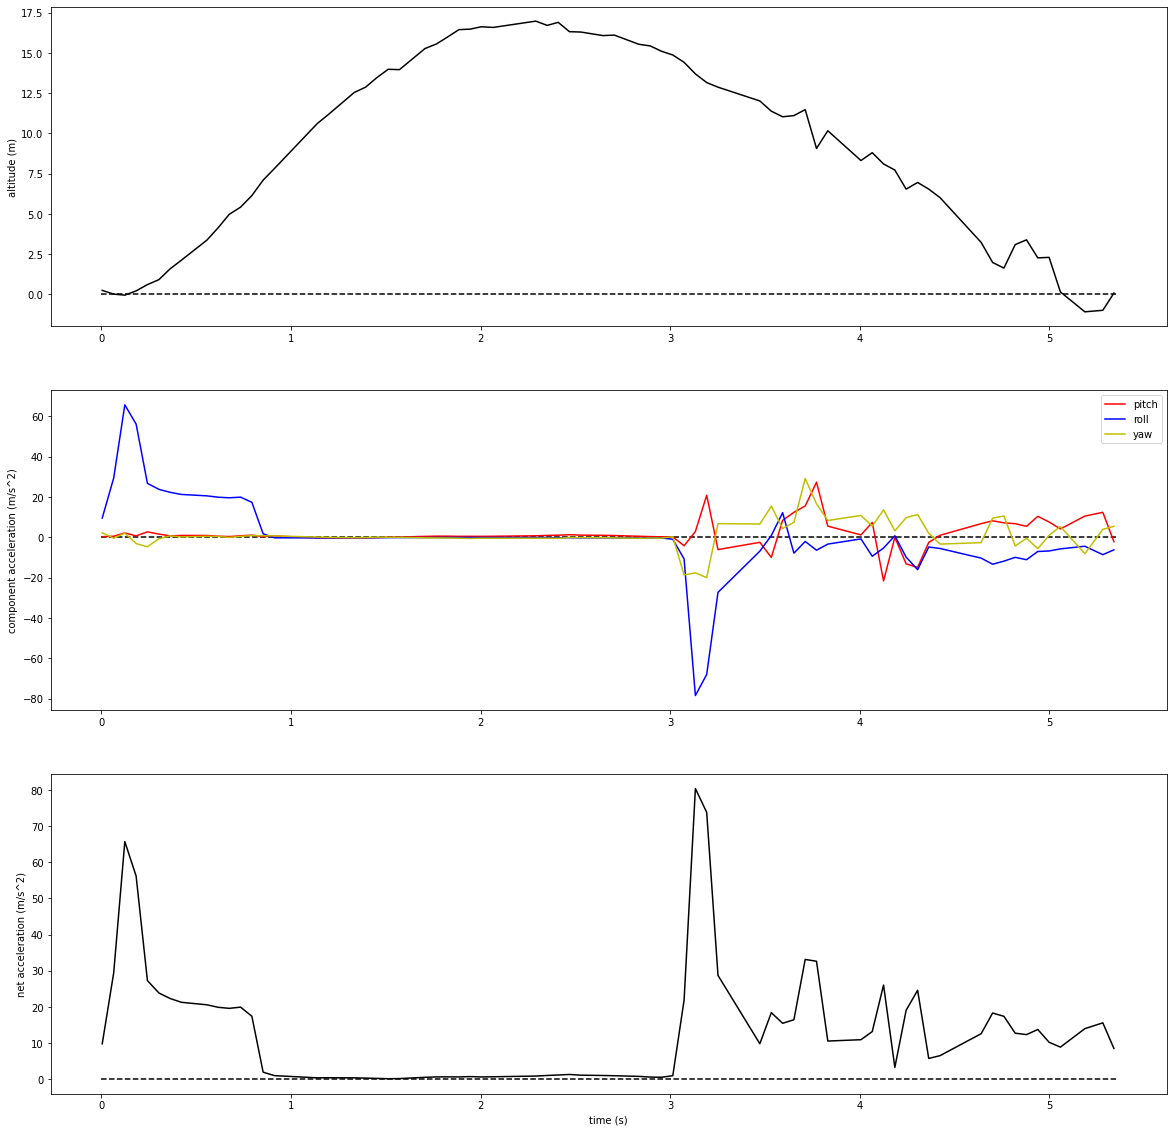

In [95]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot([0, end_time - start_time], [0, 0], "k--")
ax1.plot(flight_data.index - start_time, flight_data.alt - ground_elevation, color='k')
ax1.set_ylabel('altitude (m)')

ax2 = fig.add_subplot(3, 1, 2)
ax2.plot([0, end_time - start_time], [0, 0], "k--")
ax2.plot(flight_data.index - start_time, flight_data.pitch_a, color='r', label='pitch')
ax2.plot(flight_data.index - start_time, flight_data.roll_a, color='b', label='roll')
ax2.plot(flight_data.index - start_time, flight_data.yaw_a, color='y', label='yaw')
ax2.set_ylabel('component acceleration (m/s^2)')
ax2.legend(loc='best')

ax3 = fig.add_subplot(3, 1, 3)
ax3.plot([0, end_time - start_time], [0, 0], "k--")
ax3.plot(flight_data.index - start_time, net_accel, color='k')
ax3.set_ylabel('net acceleration (m/s^2)')
ax3.set_xlabel('time (s)')


# Rotation

The next set of plots visualizes the rotation of the rocket by components and overall rotation.

## Raw rotation components

This first plot graphs the rotation components around the three rotation axes.

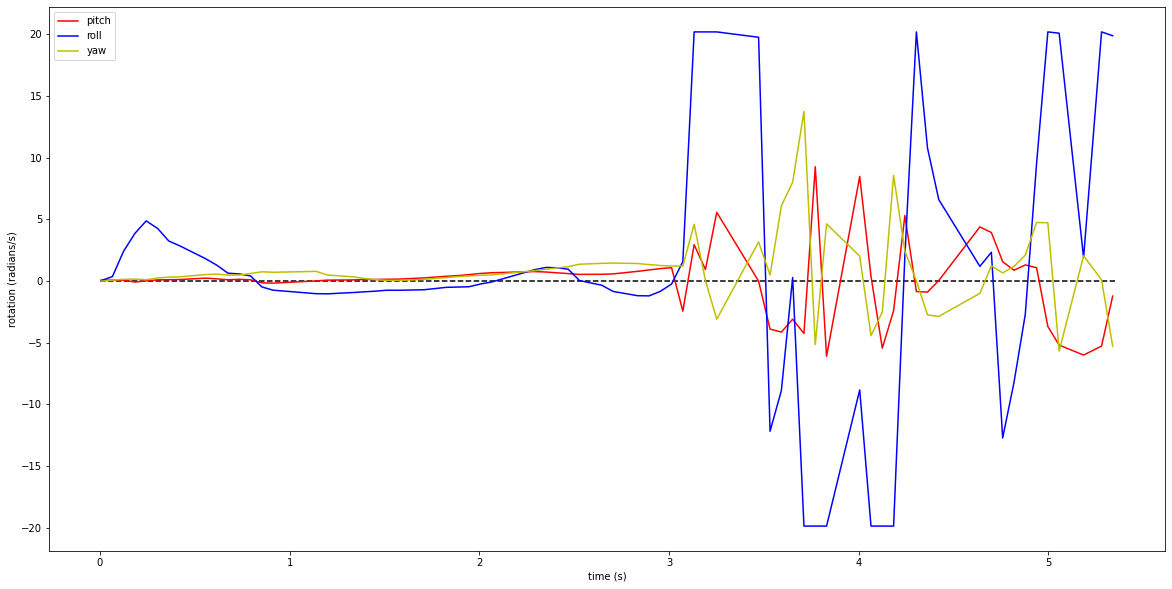

In [96]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot([0, end_time - start_time], [0, 0], "k--")
ax.plot(flight_data.index - start_time, flight_data.pitch_r, color='r', label='pitch')
ax.plot(flight_data.index - start_time, flight_data.roll_r, color='b', label='roll')
ax.plot(flight_data.index - start_time, flight_data.yaw_r, color='y', label='yaw')
ax.set_xlabel('time (s)')
ax.set_ylabel('rotation (radians/s)')
ax.legend(loc='best')


## Roll and pitch/yaw rotations

Because there is no meaningful difference between rotations in the pitch and yaw directions, it's useful to calculate their vector sum (here called the "pitch/yaw" rotation). The pitch/yaw values are always positive and don't have a fixed rotation axis other than that the axis is somewhere in the plane perpendicular to the roll axis. The pitch/yaw rotation is a motion where the rocket nose and tail rotate around the center of gravity, so one could think of it as a "tumbling" rotation. The remaining rotation is around the roll axis.

Text(0, 0.5, 'pitch/yaw rotation (radians/s)')

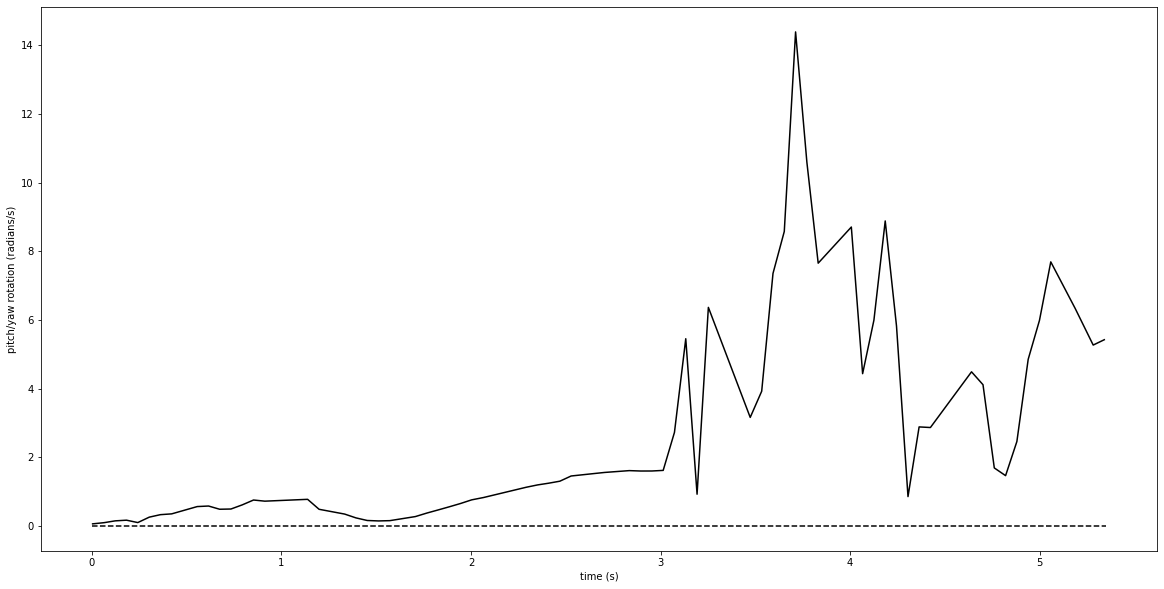

In [97]:
# Calculate pitch/yaw rotation, i.e. the vector sum of patch and yaw rotations, given the rotation in the
# plane perpendicular to the roll axis. You can think of this as the rate of tumbling
pitch_yaw = np.sqrt(flight_data.pitch_r**2 + flight_data.yaw_r**2)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot([0, end_time - start_time], [0, 0], "k--")
ax.plot(flight_data.index - start_time, pitch_yaw, color='k')
ax.set_xlabel('time (s)')
ax.set_ylabel('pitch/yaw rotation (radians/s)')


## Composite rotation plot

In this plot, the roll and pitch/yaw rotations are plotted on the same axes and plotted below the altitude to make it easier to see how rotation changed during the flight.

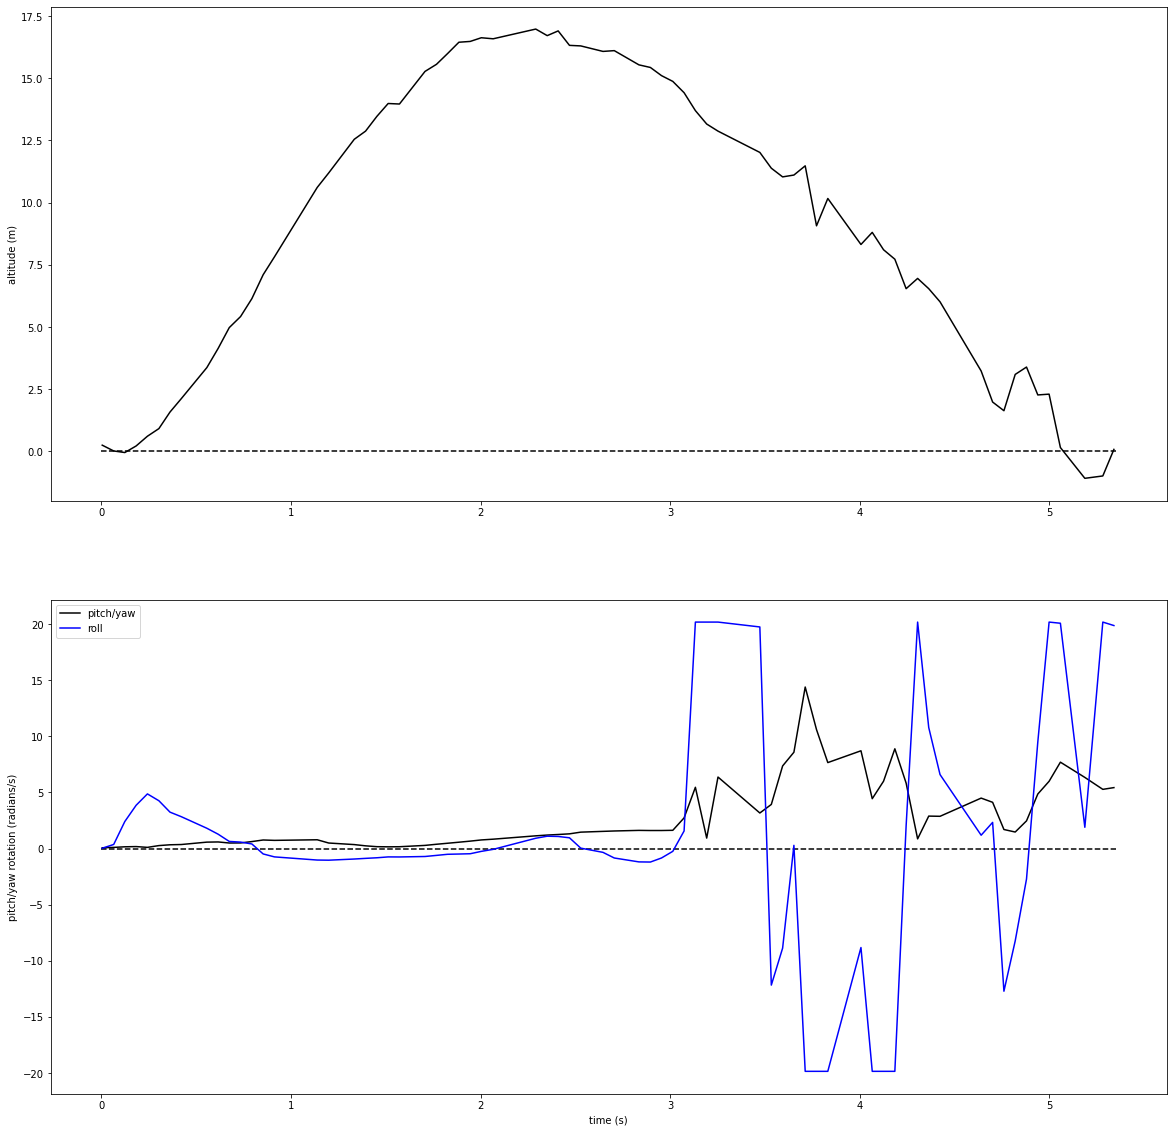

In [98]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot([0, end_time - start_time], [0, 0], "k--")
ax1.plot(flight_data.index - start_time, flight_data.alt - ground_elevation, color='k')
ax1.set_ylabel('altitude (m)')

ax = fig.add_subplot(2, 1, 2)
ax.plot([0, end_time - start_time], [0, 0], "k--")
ax.plot(flight_data.index - start_time, pitch_yaw, color='k', label = 'pitch/yaw')
ax.plot(flight_data.index - start_time, flight_data.roll_r, color='b', label='roll')
ax.set_xlabel('time (s)')
ax.set_ylabel('pitch/yaw rotation (radians/s)')
ax.legend(loc='best')

# Comparison of all measured flight motions

The final plot compares the altitude, accleleration components, overall acceleration, and rotation over the course of the flight. This is perhaps the easiest way to visualize the effects of various segments of the rocket flight.

For example, the diagram below shows what is happening during the sequence of a flight using a B6-2 engine where the sensor package was carried by it's own momentum out of the payload section of the rocket after the payload section was ejected during parachute deployment.

![motion plots labeled by flight segments](test_flight_viz.png)

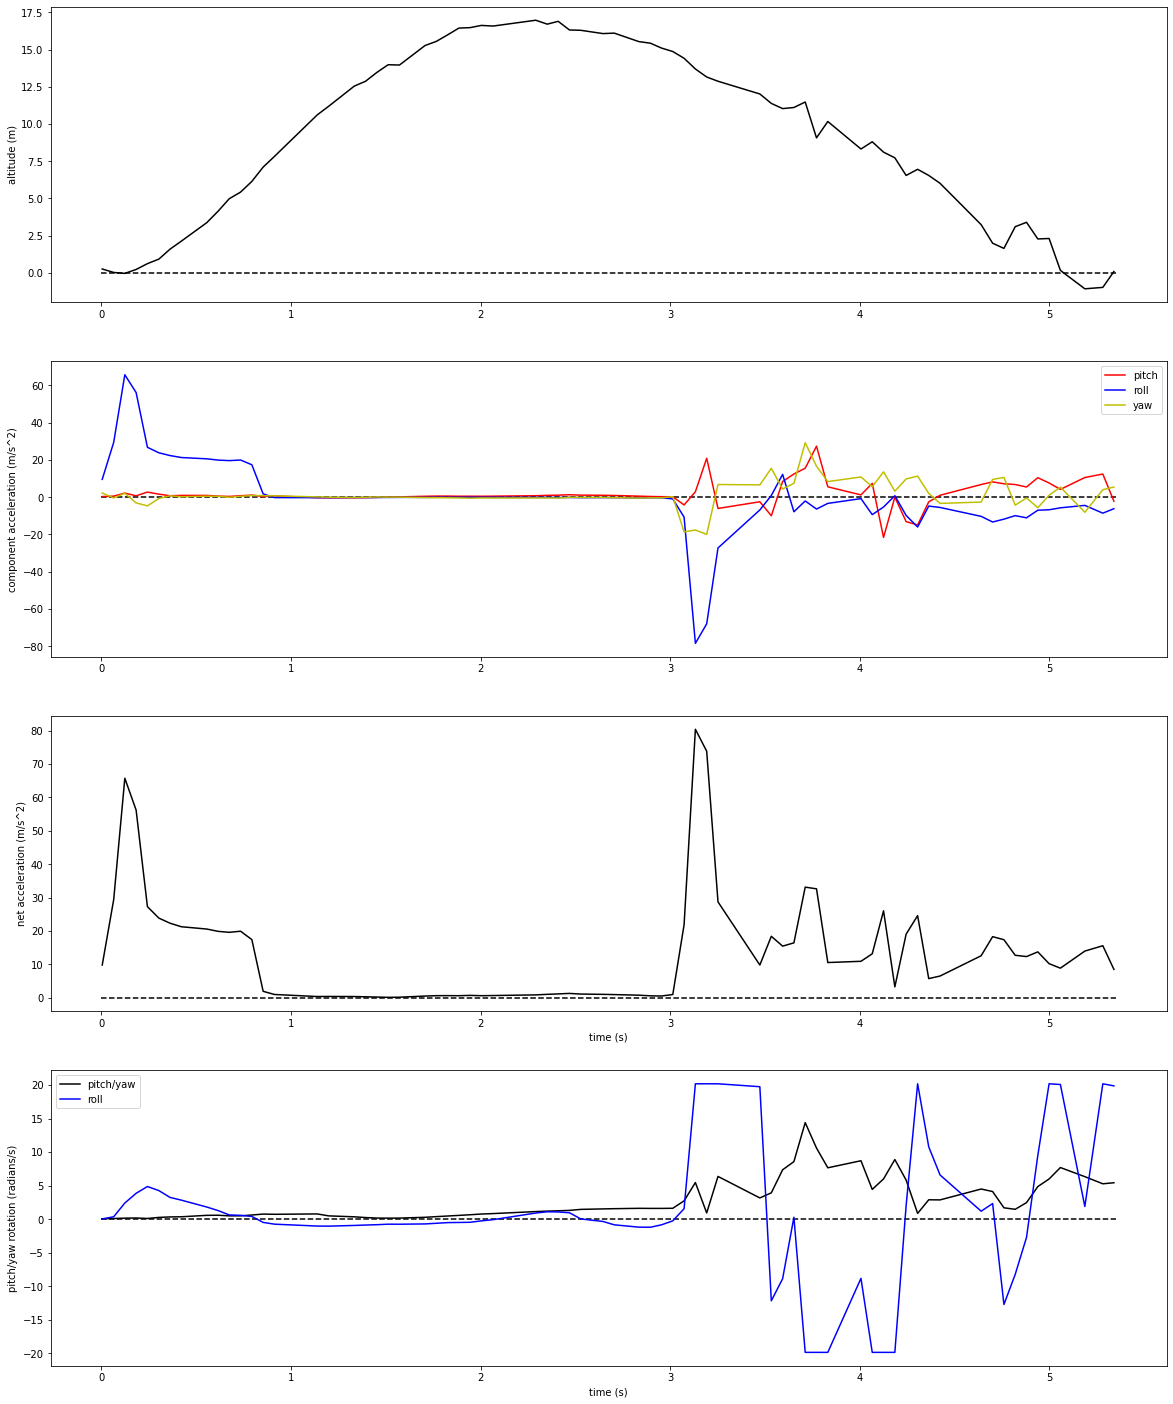

In [88]:
fig = plt.figure(figsize=(20,25))
ax1 = fig.add_subplot(4, 1, 1)
ax1.plot([0, end_time - start_time], [0, 0], "k--")
ax1.plot(flight_data.index - start_time, flight_data.alt - ground_elevation, color='k')
ax1.set_ylabel('altitude (m)')

ax2 = fig.add_subplot(4, 1, 2)
ax2.plot([0, end_time - start_time], [0, 0], "k--")
ax2.plot(flight_data.index - start_time, flight_data.pitch_a, color='r', label='pitch')
ax2.plot(flight_data.index - start_time, flight_data.roll_a, color='b', label='roll')
ax2.plot(flight_data.index - start_time, flight_data.yaw_a, color='y', label='yaw')
ax2.set_ylabel('component acceleration (m/s^2)')
ax2.legend(loc='best')

ax = fig.add_subplot(4, 1, 3)
ax.plot([0, end_time - start_time], [0, 0], "k--")
ax.plot(flight_data.index - start_time, net_accel, color='k')
ax.set_xlabel('time (s)')
ax.set_ylabel('net acceleration (m/s^2)')

ax3 = fig.add_subplot(4, 1, 4)
ax3.plot([0, end_time - start_time], [0, 0], "k--")
ax3.plot(flight_data.index - start_time, pitch_yaw, color='k', label = 'pitch/yaw')
ax3.plot(flight_data.index - start_time, flight_data.roll_r, color='b', label='roll')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('pitch/yaw rotation (radians/s)')
ax3.legend(loc='best')
